<a href="https://colab.research.google.com/github/danacioDS/AI-ML-SimpliLearn/blob/master/02_China_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt


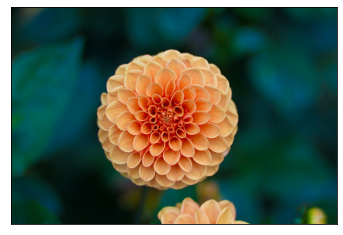

In [46]:
from sklearn.datasets import load_sample_image
china = load_sample_image('flower.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [42]:
# returns the dimension of the array

china.shape

(427, 640, 3)

In [47]:
# reshape the data to [n_samples x n_samples]; and scale the colors
# so that they lie between 0 and 1 

data = china /255.0 # use 0....1 scale
data = data.reshape(427*640, 3)
data.shape

(273280, 3)

In [52]:
china.T

array([[[ 2,  1,  2, ...,  0,  0,  0],
        [ 3,  3,  6, ...,  1,  1,  1],
        [ 7,  7,  7, ...,  1,  1,  0],
        ...,
        [ 1,  0,  1, ...,  5,  6,  7],
        [ 0,  1,  1, ...,  6,  7,  8],
        [ 0,  1,  1, ...,  7,  7,  9]],

       [[19, 18, 17, ..., 46, 47, 47],
        [18, 18, 19, ..., 48, 48, 48],
        [20, 20, 20, ..., 47, 47, 46],
        ...,
        [77, 76, 74, ..., 44, 45, 46],
        [76, 74, 74, ..., 43, 44, 45],
        [75, 74, 74, ..., 44, 44, 43]],

       [[13, 12, 12, ..., 40, 41, 41],
        [13, 13, 12, ..., 40, 40, 40],
        [13, 13, 13, ..., 37, 37, 36],
        ...,
        [64, 64, 65, ..., 26, 27, 28],
        [64, 65, 67, ..., 26, 27, 28],
        [63, 65, 67, ..., 27, 27, 27]]], dtype=uint8)

In [51]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [77]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
      colors = data

  # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1,2,  figsize=(16,6))
    ax[0].scatter(R, G, B, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R,B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

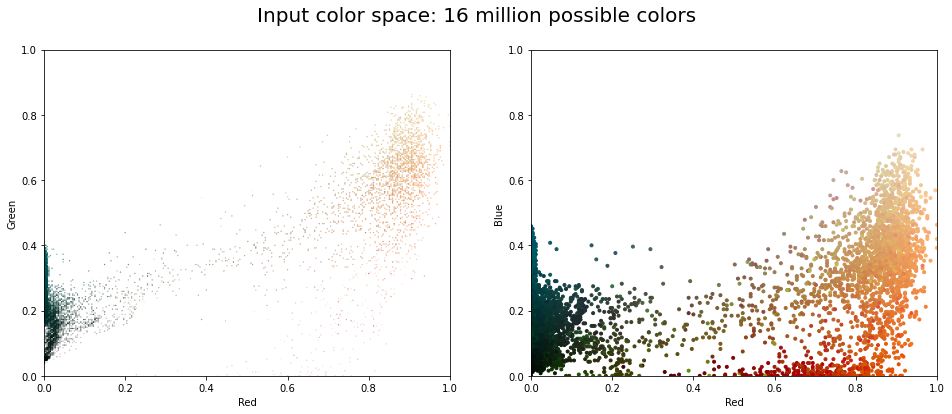

In [78]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [81]:
import warnings; warnings.simplefilter('ignore') # Numpy Issues

from sklearn.cluster import MiniBatchKMean

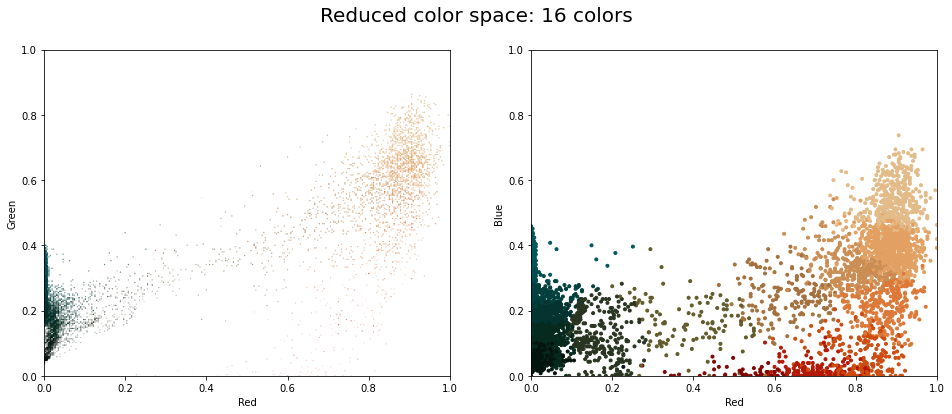

In [87]:
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, 
            title='Reduced color space: 16 colors')


Text(0.5, 1.0, '16_color image')

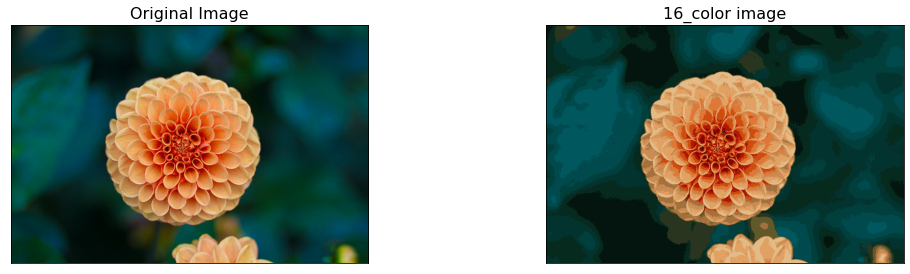

In [89]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1,2, figsize=(16,6), 
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.5)

ax[0].imshow(china)
ax[0].set_title('Original Image', size = 16)
ax[1].imshow(china_recolored)
ax[1].set_title('16_color image', size=16)